# Unsupervised Learning:

1.Clustering

2.Dimensionality Reduction

Today Objective :
    
    1.Clustering:Clustering is a Group of set of data points or objects in a dataset that are similar to other objects in the group and dis-similar objects in other Groups.
    
    a. KMeans Clustering.

Applying clustering in the iris Dataset.

Inertia :The error rate is measured by inertia in Clustering for all Datapoints.

K values :Where the Value of k Becomes elbow curve it is the Best K Value.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
#Here we are Not giving Target variable.

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])

#Here there is No target Variable in that Because it is Unsupervised.

In [6]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [7]:
#Here we are visualizing the Iris Data..To know the Groups for Understanding..

In [8]:
import matplotlib.pyplot as plt

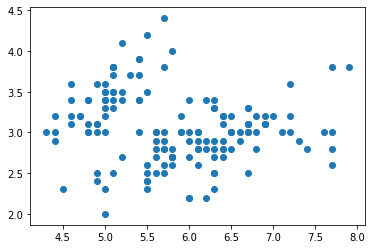

In [9]:
plt.figure()
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)']) #Took 2 features from df.

In [10]:
X = df[['sepal length (cm)','sepal width (cm)']]

Spliting the data for training and testing..

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test = train_test_split(X,train_size=0.7) #Observe thet Target is Not there..-->y is not there.

In [13]:
print(X_train.shape)
print(X_test.shape)

(105, 2)
(45, 2)


# K-Means ALgorithm for Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmodel = KMeans(n_clusters=3) #clusters =No 0f Groups to divide.0,1,2 are the clusters.

In [16]:
kmodel.fit(X_train) #Here 3 clusters are made from data.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_pred = kmodel.predict(X_test) #Predicting the target using X_test using cluster.

In [18]:
y_pred  #these values are related to X_test input values.

array([1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0,
       0])

In [19]:
X_test.head()

,sepal length (cm),sepal width (cm)
4,5.0,3.6
52,6.9,3.1
31,5.4,3.4
124,6.7,3.3
70,5.9,3.2


Properties  of Clustering:

1.All Datapoints in a cluster similar to each other.

2.The data point from different clusters should be different as possible.

# The Inertia for different K and where the elbow occur that is the best K.

In [20]:
range_of_k =range(1,7)

mylist=[] #To store the inertia data for each K.

for k in range_of_k:
    kmodel =KMeans(n_clusters=k)
    kmodel.fit(X)
    inertia = kmodel.inertia_
    print('{}Inertia for k={}'.format(inertia,k))
    mylist.append(inertia)

130.47526666666667Inertia for k=1
58.20409278906671Inertia for k=2
37.05070212765958Inertia for k=3
28.0286479357396Inertia for k=4
21.00466066066066Inertia for k=5
17.606284438735482Inertia for k=6


In [21]:
#To know the Best K Value.We have to Visualize the above.

#The elbow curve is the curve it is the Best POint of K.

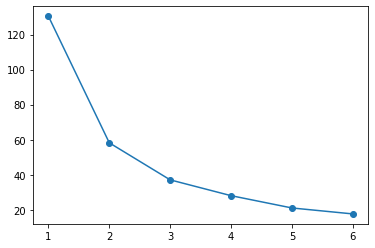

In [22]:
plt.figure()
plt.plot(range_of_k,mylist,marker='o')
plt.show()

Here elbow at point 3 and 4 It is the Best K .

# Applying Kmeans in Wine Dataset.

In [23]:
import pandas as pd
import numpy as np

In [24]:
#Getting the Data..

df_white = pd.read_csv('winequality-white.csv',sep=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
#Before sep=';' The data is nit in csv it is with ';'.so we used this sep in read_csv.

In [26]:
df_red = pd.read_csv('winequality-red.csv',sep=';')

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
df_white.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [28]:
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

**combine two datasets**


In [29]:
df=pd.concat([df_white,df_red]) #combined to dataframes.

In [30]:
df.shape

(6497, 12)

In [31]:
df_red.shape

(1599, 12)

In [32]:
df_white.shape


(4898, 12)

In [33]:
df.isna().sum() #Checking the DataFrame is their Null or Not.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [35]:
X=df.drop('quality',axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [36]:
from sklearn.cluster import KMeans

Identifying the Best clusters

In [37]:
range_cluster_number = range(1,20)

mylist=[]

for k in range_cluster_number:
    kmodel = KMeans(n_clusters=k)
    kmodel.fit(X)
    inertia = kmodel.inertia_
    mylist.append(inertia) #AFter inertia values the values added to the list.
    

In [41]:
%matplotlib notebook 

In [42]:
#Magical function to visualize best results of Figure.

<IPython.core.display.Javascript object>


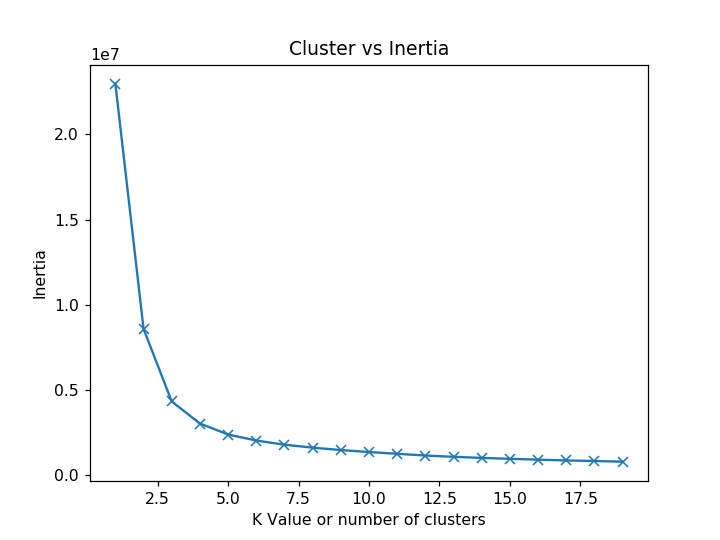

In [47]:
plt.figure()
plt.plot(range_cluster_number,mylist,marker='x')
plt.xlabel("K Value or number of clusters")
plt.ylabel("Inertia")
plt.title("Cluster vs Inertia")
plt.show()

In [45]:
#Here from 2 to 5 are the Best clusters.